# In this Dataset we are going to Predict Restaurant Food Cost 

importing necessary library

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#importing warnings
import warnings
warnings.filterwarnings('ignore')

In [159]:
#loading the train dataset
df=pd.read_excel('restaurant_train.xlsx')
df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [160]:
#loading the test dataset
df1=pd.read_excel('restaurant_test.xlsx')
df1.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


Now from here ,we first analyze the train data and then the same process is repeated for test data.

If we concate train & test data,then there is a chance of data leakage,so we analyze them seperately

# TRAIN DATA

In [161]:
df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [162]:
#checking shape of dataset
df.shape

(12690, 9)

The given dataset contains 12690 rows & 9 column

In [163]:
#checking column names
df.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')

# columns description:

In [164]:
#checking the information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [165]:
#checking the datatype
df.dtypes

TITLE            object
RESTAURANT_ID     int64
CUISINES         object
TIME             object
CITY             object
LOCALITY         object
RATING           object
VOTES            object
COST              int64
dtype: object

OBSERVATION:

1.All the columns are of object datatype except RESTAURANT_ID & COST

2.RESTAURANT_ID & COST are of int64 datatype

In [166]:
#checking for null values
df.isnull().values.any()

True

It means that null values are present in our dataset

In [167]:
#checking for null values in each column
df.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

Observation:

1. 112 null values are present in City column

2. 98 null values are present in locality column

3. 2 null values are present in Ratings column


4. 1204 null values are present in votes column

we can also see it via visualization with the help of heatmap

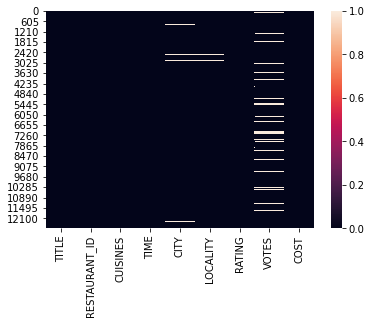

In [168]:
#visualization
sns.heatmap(df.isnull())

In [169]:
#imputing the missing values with mode

for col in ['CITY','LOCALITY','RATING','VOTES']:
    df[col].fillna(df[col].mode()[0],inplace=True)

In [170]:
#now again checking for missing values

df.isnull().values.any()

False

Now our null values is removed.We can see it via visualisation

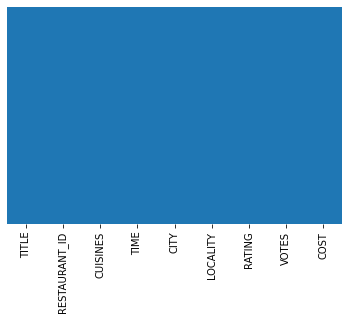

In [171]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='tab20')

# Summary Statistics

In [172]:
df.describe()

,RESTAURANT_ID,COST
count,12690.000000,12690.000000
mean,7759.134121,655.252246
std,4504.874150,627.003540
min,0.000000,20.000000
25%,3863.250000,300.000000
50%,7740.000000,500.000000
75%,11688.750000,800.000000
max,15573.000000,14000.000000


OBSERVATION:

1.Minimum cost is 20 rs & maximum cost is 14000

2.Mean is greater than median ,which means COST column is right skewed

# Exploring Data Variables

In [173]:
#printing objects datatypes & their unique values

for col in df.columns:
    if df[col].dtype==object:
        print(str(col) +':'+str(df[col].unique()))
        print(df[col].value_counts())
        print('******************************************************************************')
        print('\n')

TITLE:['CASUAL DINING' 'CASUAL DINING,BAR' 'QUICK BITES' 'DESSERT PARLOR' 'CAFÉ'
 'MICROBREWERY' 'QUICK BITES,BEVERAGE SHOP' 'CASUAL DINING,IRANI CAFE'
 'BAKERY,QUICK BITES' 'None' 'BAR,CASUAL DINING' 'BAR' 'PUB'
 'BEVERAGE SHOP' 'FINE DINING' 'CAFÉ,QUICK BITES'
 'BEVERAGE SHOP,DESSERT PARLOR' 'SWEET SHOP,QUICK BITES'
 'DESSERT PARLOR,SWEET SHOP' 'BAKERY' 'BAKERY,DESSERT PARLOR' 'BAR,LOUNGE'
 'FOOD COURT' 'LOUNGE' 'DESSERT PARLOR,BEVERAGE SHOP'
 'LOUNGE,CASUAL DINING' 'FOOD TRUCK' 'QUICK BITES,FOOD COURT' 'SWEET SHOP'
 'BEVERAGE SHOP,FOOD COURT' 'PUB,CASUAL DINING' 'MESS'
 'MICROBREWERY,CASUAL DINING' 'CASUAL DINING,SWEET SHOP' 'KIOSK'
 'QUICK BITES,KIOSK' 'CLUB' 'FINE DINING,BAR' 'DESSERT PARLOR,QUICK BITES'
 'FOOD COURT,QUICK BITES' 'LOUNGE,CAFÉ' 'BAKERY,CONFECTIONERY'
 'CASUAL DINING,CAFÉ' 'DHABA' 'CAFÉ,DESSERT PARLOR'
 'QUICK BITES,DESSERT PARLOR' 'PUB,MICROBREWERY' 'LOUNGE,BAR'
 'DESSERT PARLOR,CAFÉ' 'CAFÉ,BAR' 'SWEET SHOP,CONFECTIONERY'
 'CASUAL DINING,PUB' 'MICROBREWERY,BAR' 'DE

Here we see the summary of categorical column

In [174]:
df['RESTAURANT_ID'].nunique()

11892

Here all values of RESTAURANT_ID's are unique so I am deleting this column

In [175]:
df.drop('RESTAURANT_ID',axis=1,inplace=True)

In [176]:
df['TIME'].unique()

array(['11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)', '6pm – 11pm (Mon-Sun)',
       '11am – 3:30pm, 7pm – 11pm (Mon-Sun)', ...,
       '12:1pm – 4am (Mon-Sun)', '12:30pm – 9:45pm (Mon-Sun)',
       '12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...'], dtype=object)

Here Time has many unique values and it will not depend upon Price so I am deleting this column

In [177]:
df.drop('TIME',axis=1,inplace=True)

In [178]:
df['RATING'].unique()

array(['3.6', '4.2', '3.8', '4.1', '4.0', '4.3', '3.9', '3.3', '3.4', '-',
       '4.5', '3.5', '4.4', '2.7', '3.7', '4.7', 'NEW', '3.1', '2.5',
       '4.6', '2.8', '3.0', '3.2', '2.6', '2.9', '4.9', '4.8', '2.4',
       '2.3', '2.0', '2.1', '2.2'], dtype=object)

In [179]:
df['RATING'].mode()

0    3.9
dtype: object

In [180]:
df.replace({'NEW': 3.9, '-': 3.9},inplace=True)

In [181]:
df['VOTES'].unique()

array(['49 votes', '30 votes', '221 votes', ..., '2723 votes',
       '1426 votes', '1214 votes'], dtype=object)

In [182]:
df['VOTES'] = df['VOTES'].str.replace(' votes', '').astype(float)

In [183]:
df['VOTES'].value_counts()

44.0      1275
29.0        66
28.0        66
38.0        65
35.0        64
          ... 
4801.0       1
2923.0       1
1273.0       1
5227.0       1
1654.0       1
Name: VOTES, Length: 1847, dtype: int64

In [184]:
df['VOTES'].unique()

array([  49.,   30.,  221., ..., 2723., 1426., 1214.])

In [185]:
df.columns

Index(['TITLE', 'CUISINES', 'CITY', 'LOCALITY', 'RATING', 'VOTES', 'COST'], dtype='object')

In [186]:
df['CUISINES'].head(5)

0                   Malwani, Goan, North Indian
1                Asian, Modern Indian, Japanese
2    North Indian, Chinese, Biryani, Hyderabadi
3                              Tibetan, Chinese
4                                      Desserts
Name: CUISINES, dtype: object

In [187]:
df['CUISINES1']=df['CUISINES'].str.split(',').str[0]
df['CUISINES2']=df['CUISINES'].str.split(',').str[1]
df['CUISINES3']=df['CUISINES'].str.split(',').str[2]
df['CUISINES4']=df['CUISINES'].str.split(',').str[3]
df['CUISINES5']=df['CUISINES'].str.split(',').str[4]

In [188]:
df.isnull().sum()

TITLE            0
CUISINES         0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
COST             0
CUISINES1        0
CUISINES2     3062
CUISINES3     6999
CUISINES4     9995
CUISINES5    11675
dtype: int64

In [189]:
df['CUISINES2'].fillna('XXX',inplace=True)
df['CUISINES3'].fillna('XXX',inplace=True)
df['CUISINES4'].fillna('XXX',inplace=True)
df['CUISINES5'].fillna('XXX',inplace=True)


In [190]:
df.drop(['CUISINES'],axis=1,inplace=True)

In [191]:
df['TITLE1']=df['TITLE'].str.split(',').str[0]
df['TITLE2']=df['TITLE'].str.split(',').str[1]

In [192]:
print(df['TITLE1'].isnull().sum())
print(df['TITLE2'].isnull().sum())

0
11208


In [193]:
#In TITLE2 11208 rows are null,so we can drop it
df.drop(['TITLE','TITLE2'],axis=1,inplace=True)

In [194]:
df.columns

Index(['CITY', 'LOCALITY', 'RATING', 'VOTES', 'COST', 'CUISINES1', 'CUISINES2',
       'CUISINES3', 'CUISINES4', 'CUISINES5', 'TITLE1'],
      dtype='object')

In [195]:
df['CITY'].nunique()

359

In [196]:
df

,CITY,LOCALITY,RATING,VOTES,COST,CUISINES1,CUISINES2,CUISINES3,CUISINES4,CUISINES5,TITLE1
0,Thane,Dombivali East,3.6,49.0,1200,Malwani,Goan,North Indian,XXX,XXX,CASUAL DINING
1,Chennai,Ramapuram,4.2,30.0,1500,Asian,Modern Indian,Japanese,XXX,XXX,CASUAL DINING
2,Chennai,Saligramam,3.8,221.0,800,North Indian,Chinese,Biryani,Hyderabadi,XXX,CASUAL DINING
3,Mumbai,Bandra West,4.1,24.0,800,Tibetan,Chinese,XXX,XXX,XXX,QUICK BITES
4,Mumbai,Lower Parel,3.8,165.0,300,Desserts,XXX,XXX,XXX,XXX,DESSERT PARLOR
...,...,...,...,...,...,...,...,...,...,...,...
12685,Hyderabad,Gachibowli,3.8,546.0,500,North Indian,Burger,Kebab,XXX,XXX,QUICK BITES
12686,Mumbai,Bandra Kurla Complex,4.3,1214.0,1800,Goan,Continental,XXX,XXX,XXX,CASUAL DINING
12687,Navi Mumbai,Vashi,4.0,608.0,1300,Finger Food,Continental,Asian,Chinese,XXX,LOUNGE
12688,Chennai,Maduravoyal,3.5,32.0,400,North Indian,South Indian,Chinese,Street Food,XXX,CASUAL DINING


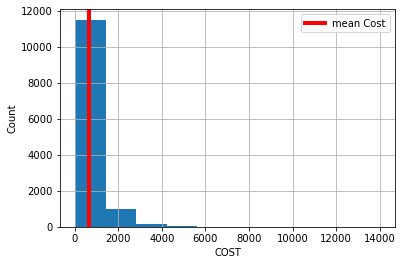

In [197]:
#checking COST count of Restaurant

#checking the mean cost
fees=df['COST'].hist()
mean_val=np.mean(df['COST'])
plt.axvline(mean_val,linewidth=4,color='red',label='mean Cost')
plt.xlabel('COST')
plt.ylabel('Count')
plt.legend()
plt.show()

OBSERVATION

   The mean cost is around 600 rs

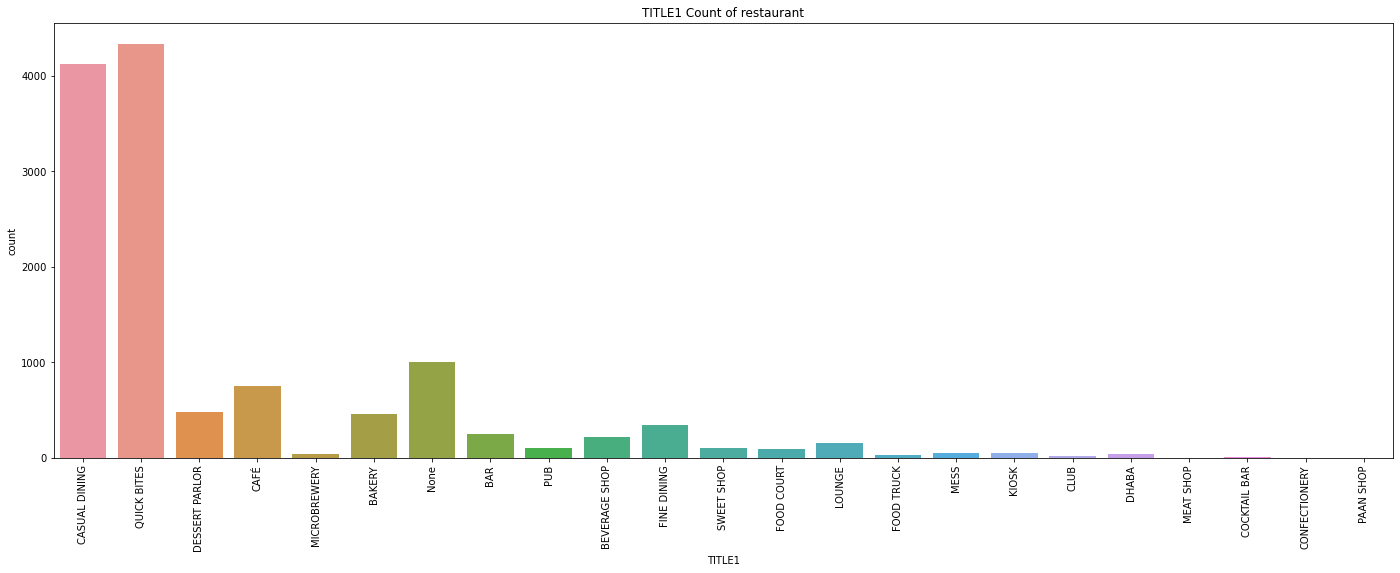

QUICK BITES       4337
CASUAL DINING     4122
None              1003
CAFÉ               749
DESSERT PARLOR     478
BAKERY             463
FINE DINING        350
BAR                254
BEVERAGE SHOP      215
LOUNGE             154
PUB                103
SWEET SHOP         102
FOOD COURT          93
KIOSK               56
MESS                53
DHABA               45
MICROBREWERY        44
FOOD TRUCK          30
CLUB                23
COCKTAIL BAR         6
PAAN SHOP            4
MEAT SHOP            3
CONFECTIONERY        3
Name: TITLE1, dtype: int64


In [198]:
#count by TITLE of restaurant

plt.subplots(figsize=(24,8))
sns.countplot(x='TITLE1',data=df)
plt.title('TITLE1 Count of restaurant')
plt.xticks(rotation = 90)
plt.show()

print(df['TITLE1'].value_counts())

OBSERVATION

  1.The restaurant that features QUICK BITES occurs most frequently followed by CASUAL DINING

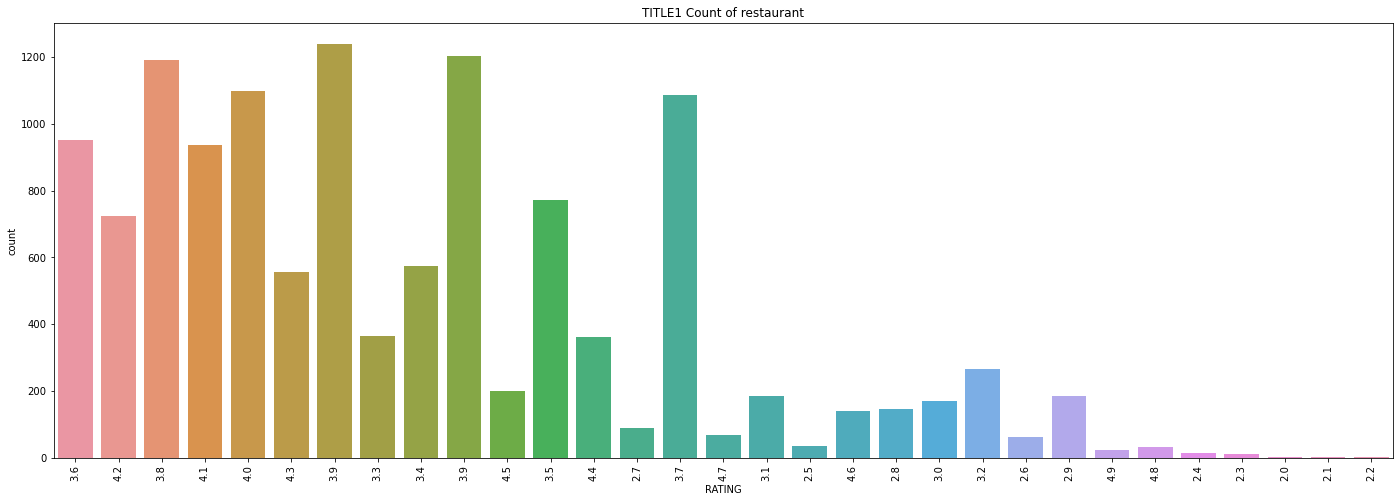

3.9    1240
3.9    1202
3.8    1190
4.0    1099
3.7    1086
3.6     951
4.1     936
3.5     771
4.2     723
3.4     575
4.3     556
3.3     365
4.4     362
3.2     266
4.5     199
2.9     186
3.1     186
3.0     170
2.8     146
4.6     141
2.7      89
4.7      69
2.6      61
2.5      35
4.8      32
4.9      22
2.4      15
2.3      10
2.1       3
2.0       2
2.2       2
Name: RATING, dtype: int64


In [199]:
#count by TITLE of restaurant

plt.subplots(figsize=(24,8))
sns.countplot(x='RATING',data=df)
plt.title('TITLE1 Count of restaurant')
plt.xticks(rotation = 90)
plt.show()

print(df['RATING'].value_counts())

In [200]:
#changing ratings column into Float type
df['RATING']=df['RATING'].astype(float)

OBSERVATION:

   1. Most of the restauramts gets average rating of 3.9 by the customer

   2.Hightest rating given by customer to restaurant is 4.9.

   3. 22 restaurants gets 4.9 rating

   4.Lowest rating given by customer to restaurant is 2.0

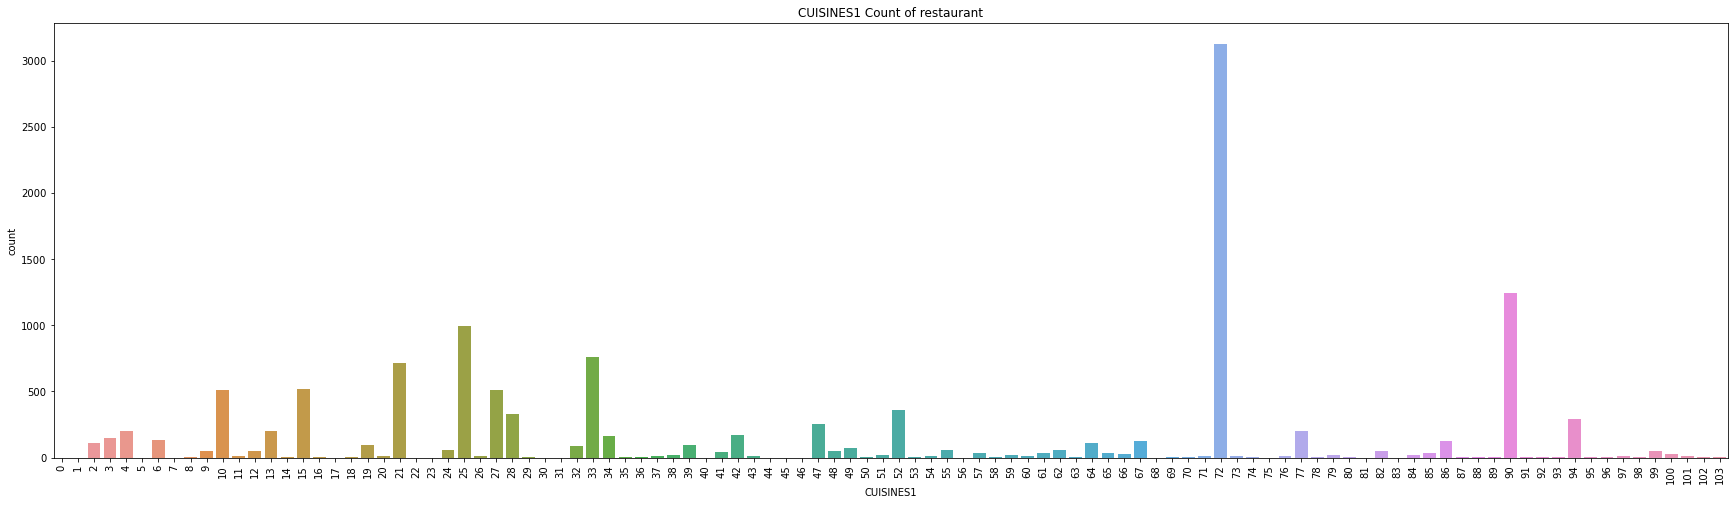

72    3129
90    1241
25     996
33     762
21     713
      ... 
5        1
68       1
44       1
83       1
0        1
Name: CUISINES1, Length: 104, dtype: int64


In [216]:
#count by CUISINES1 of restaurant

plt.subplots(figsize=(30,8))
sns.countplot(x='CUISINES1',data=df)
plt.title('CUISINES1 Count of restaurant')
plt.xticks(rotation = 90)
plt.show()

print(df['CUISINES1'].value_counts())

OBSERVATION:

1.Most of the restaurant (around 3129 ) offers North Indian Cuisines1.It means more people prefer eating north indian food

2. 1241 restaurants offer South Indian Cuisines

3. 996 restaurants offers chinese  cuisines

4. Only single- single restaurant offers Lucknowi,Assamese,Armenim,Russian,Irish cusisnes

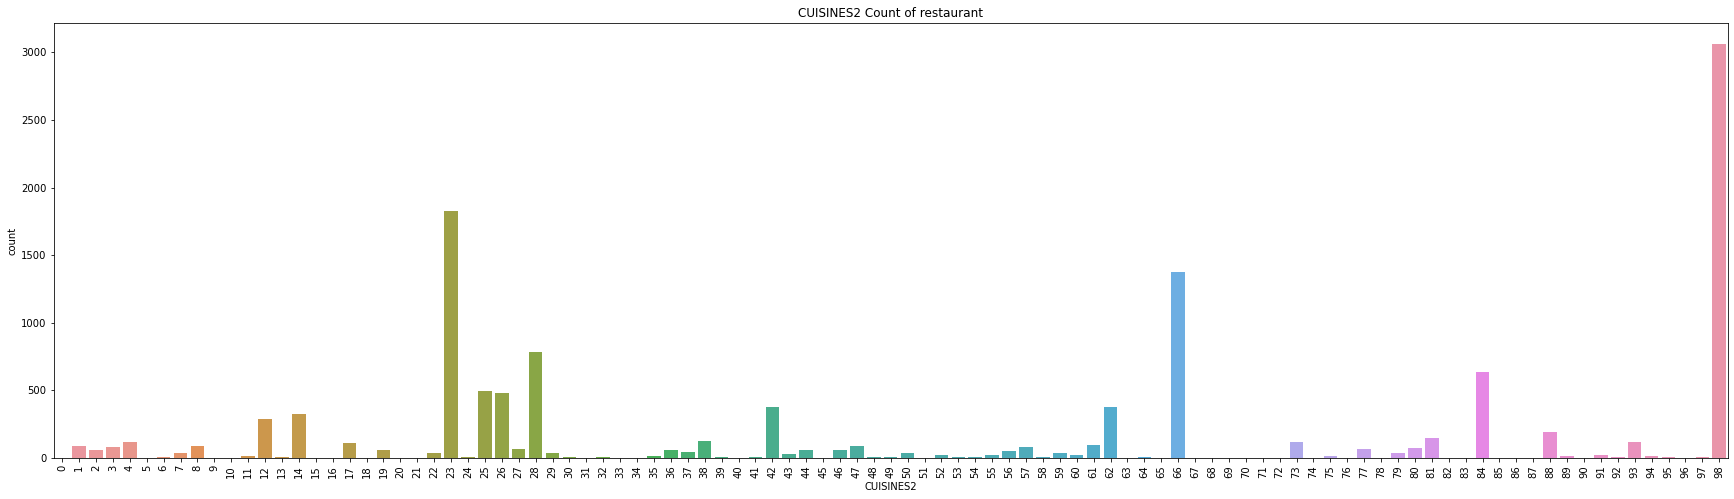

98    3062
23    1830
66    1373
28     782
84     638
      ... 
5        1
76       1
67       1
33       1
10       1
Name: CUISINES2, Length: 99, dtype: int64


In [217]:
#count by CUISINES2 of restaurant

plt.subplots(figsize=(30,8))
sns.countplot(x='CUISINES2',data=df)
plt.title('CUISINES2 Count of restaurant')
plt.xticks(rotation = 90)
plt.show()

print(df['CUISINES2'].value_counts())


Observation:

1* Around 4890 restaurants offers Chinise cuisines

2*  1373 restaurants offers NorthIndian food

3*  638 restaurant offers SouthIndian foods

4*  782 restaurants offers fast food

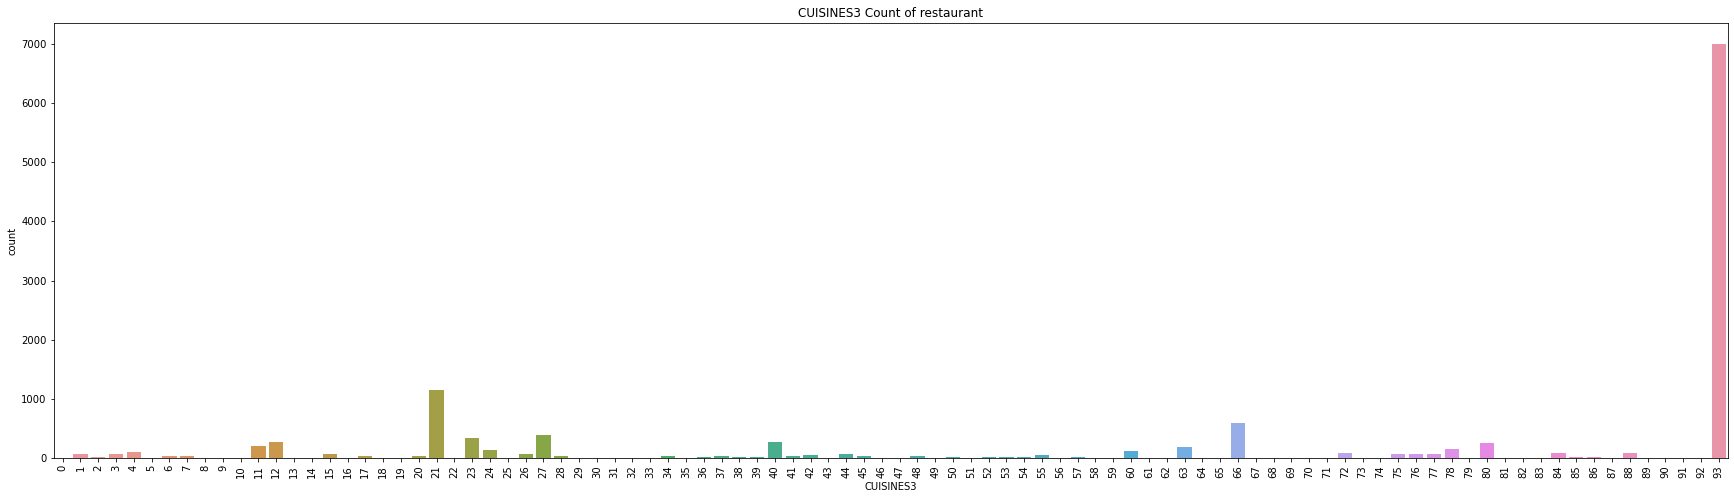

93    6999
21    1146
66     593
27     387
23     345
      ... 
61       1
30       1
9        1
14       1
64       1
Name: CUISINES3, Length: 94, dtype: int64


In [218]:
#count by CUISINES3 of restaurant

plt.subplots(figsize=(30,8))
sns.countplot(x='CUISINES3',data=df)
plt.title('CUISINES3 Count of restaurant')
plt.xticks(rotation = 90)
plt.show()

print(df['CUISINES3'].value_counts())

observation:

1*  Around 1146 restaurants offer chinese cuisine

2*  593 restaurants offers North Indian food

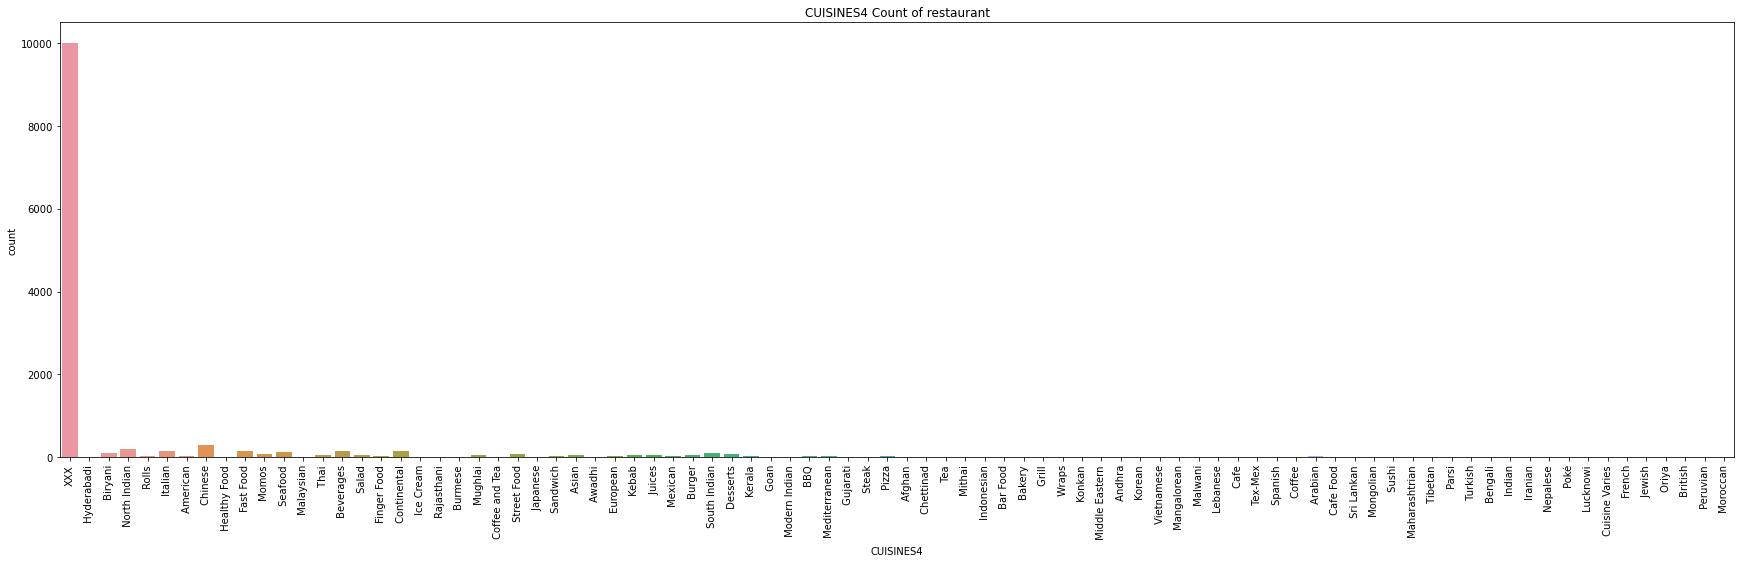

XXX                9995
 Chinese            294
 North Indian       207
 Italian            156
 Beverages          156
                   ... 
 Cuisine Varies       1
 Peruvian             1
 British              1
 Nepalese             1
 Turkish              1
Name: CUISINES4, Length: 86, dtype: int64


In [204]:
#count by CUISINES4 of restaurant

plt.subplots(figsize=(30,8))
sns.countplot(x='CUISINES4',data=df)
plt.title('CUISINES4 Count of restaurant')
plt.xticks(rotation = 90)
plt.show()

print(df['CUISINES4'].value_counts())

observation:

294 restaurants offers chinese cuisines

207 restaurant offers NorthIndian food

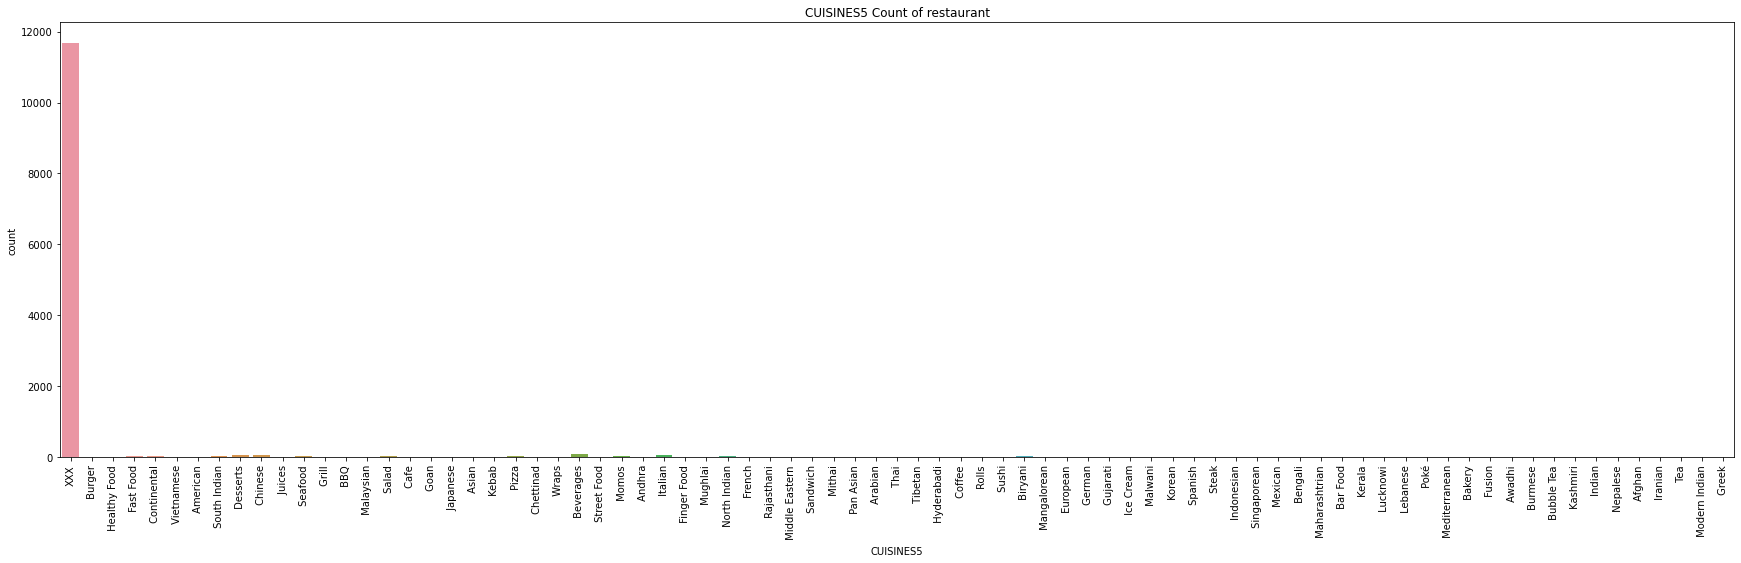

XXX           11675
 Beverages       85
 Chinese         77
 Desserts        65
 Italian         54
              ...  
 Awadhi           1
 Burmese          1
 Tibetan          1
 Nepalese         1
 Pan Asian        1
Name: CUISINES5, Length: 79, dtype: int64


In [205]:
#count by CUISINES5 of restaurant

plt.subplots(figsize=(30,8))
sns.countplot(x='CUISINES5',data=df)
plt.title('CUISINES5 Count of restaurant')
plt.xticks(rotation = 90)
plt.show()

print(df['CUISINES5'].value_counts())


OBSERVATION:

85 Restaurant offers beverages

77 restaurants offers chinise cuisine

                OVERALL OBSERVATION OF CUISINE COLUMN:

Around 5300 restaurant offers North Indian food

Around 4300 restaurants offers chinese cuisines

Around 1100 restaurants offers Fast Food

85 restaurants offers  beverages

# Bivariate Analysis

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103]),
 <a list of 104 Text major ticklabel objects>)

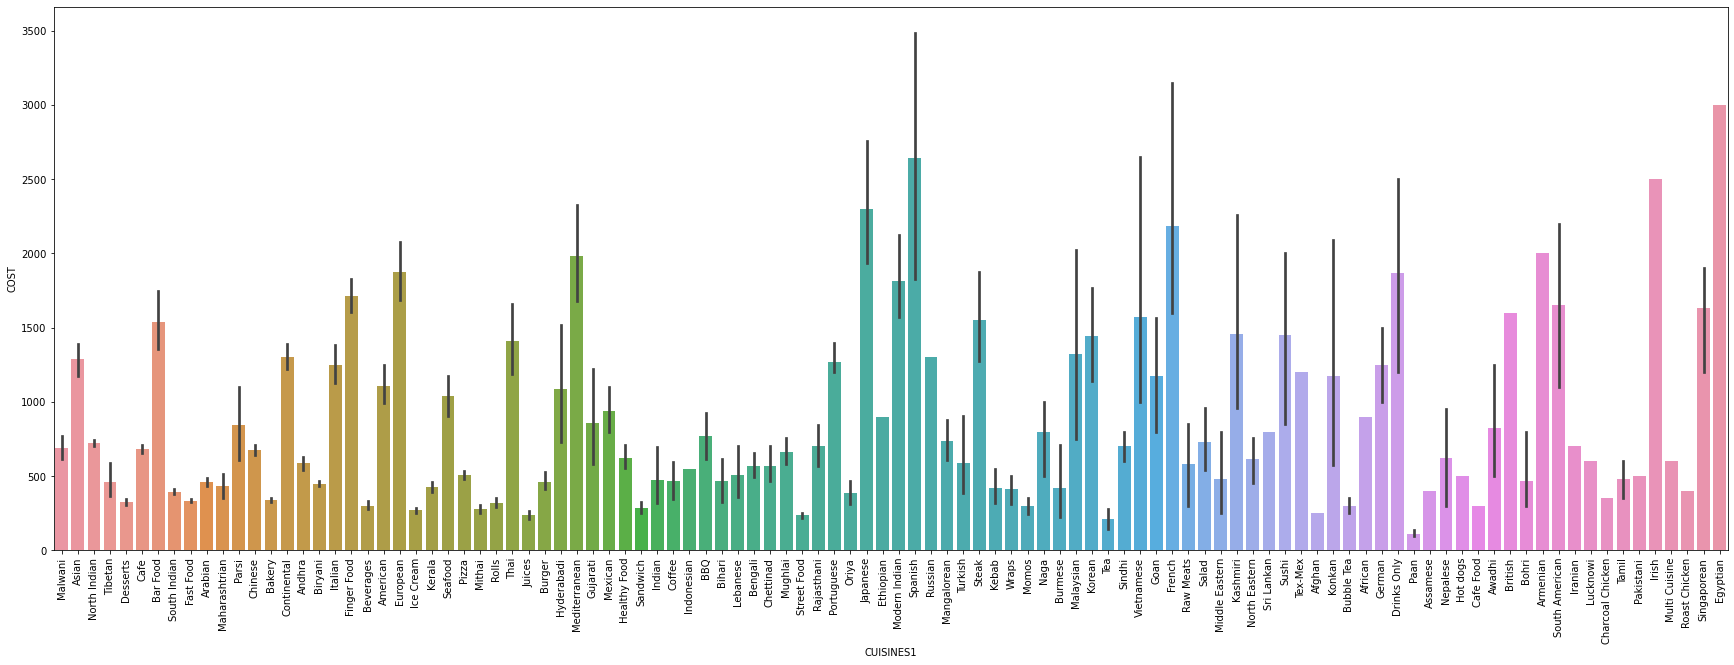

In [206]:
plt.figure(figsize=(30,10))
sns.barplot(x='CUISINES1',y='COST',data=df)
plt.xticks(rotation=90)



In [207]:
costly_cuisine=df.sort_values(by='COST',ascending=False)
costly_cuisine.head()

,CITY,LOCALITY,RATING,VOTES,COST,CUISINES1,CUISINES2,CUISINES3,CUISINES4,CUISINES5,TITLE1
1475,Bangalore,Nagawara,3.9,126.0,14000,Continental,North Indian,XXX,XXX,XXX,FINE DINING
3211,Mumbai,Colaba,4.4,592.0,10000,Japanese,Sushi,XXX,XXX,XXX,FINE DINING
1916,Hyderabad,Falaknuma,4.5,1019.0,8000,Hyderabadi,XXX,XXX,XXX,XXX,FINE DINING
7883,Hyderabad,Falaknuma,4.5,304.0,7000,Italian,Mediterranean,Thai,XXX,XXX,FINE DINING
2689,Mumbai,Mahalaxmi,4.3,340.0,6500,Continental,XXX,XXX,XXX,XXX,FINE DINING


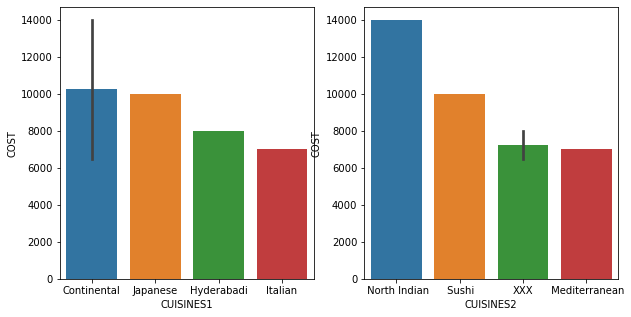

In [208]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.barplot(x='CUISINES1',y='COST',data=costly_cuisine.head())


plt.subplot(1,2,2)
sns.barplot(x='CUISINES2',y='COST',data=costly_cuisine.head())



Observation from above:

1.Continental & NorthIndian  are most costly cuisines followed bu Sushi,Japanese.Both Continental & NorthIndian  are offered in resturant that     features FINE DINING,located in Bangalore

In [209]:
low_cost_cuisine=df.sort_values(by='COST',ascending=True)
low_cost_cuisine.head(10)

,CITY,LOCALITY,RATING,VOTES,COST,CUISINES1,CUISINES2,CUISINES3,CUISINES4,CUISINES5,TITLE1
6154,Kochi,Thevera,3.9,44.0,20,Beverages,XXX,XXX,XXX,XXX,BEVERAGE SHOP
7165,Kochi,Kaloor,3.9,44.0,50,South Indian,Beverages,XXX,XXX,XXX,QUICK BITES
9578,New Delhi,Kashmiri Gate,4.3,441.0,50,Street Food,XXX,XXX,XXX,XXX,None
1185,Mumbai,Jogeshwari,3.9,44.0,50,Tea,XXX,XXX,XXX,XXX,QUICK BITES
1281,Mumbai,Girgaum,3.3,7.0,50,South Indian,North Indian,Maharashtrian,Fast Food,XXX,None
1422,Chennai,West K.K. Nagar,3.8,112.0,50,South Indian,XXX,XXX,XXX,XXX,QUICK BITES
235,Kochi,Near Marine Drive,3.9,44.0,50,Kerala,XXX,XXX,XXX,XXX,QUICK BITES
10914,New Delhi,Kamla Nagar,4.1,281.0,50,Street Food,XXX,XXX,XXX,XXX,None
3551,Secunderabad,S D Road,4.2,111.0,50,Street Food,XXX,XXX,XXX,XXX,QUICK BITES
299,Hyderabad,L B Nagar,2.7,56.0,60,Bakery,Desserts,XXX,XXX,XXX,QUICK BITES


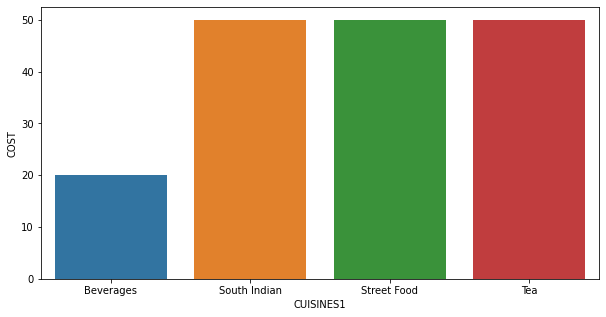

In [210]:
plt.figure(figsize=(10,5))
sns.barplot(x='CUISINES1',y='COST',data=low_cost_cuisine.head())


FINDINGS:

Beverages is the cheapest of all that cost only 20 rs fllowed by south indian,streetfood & tea

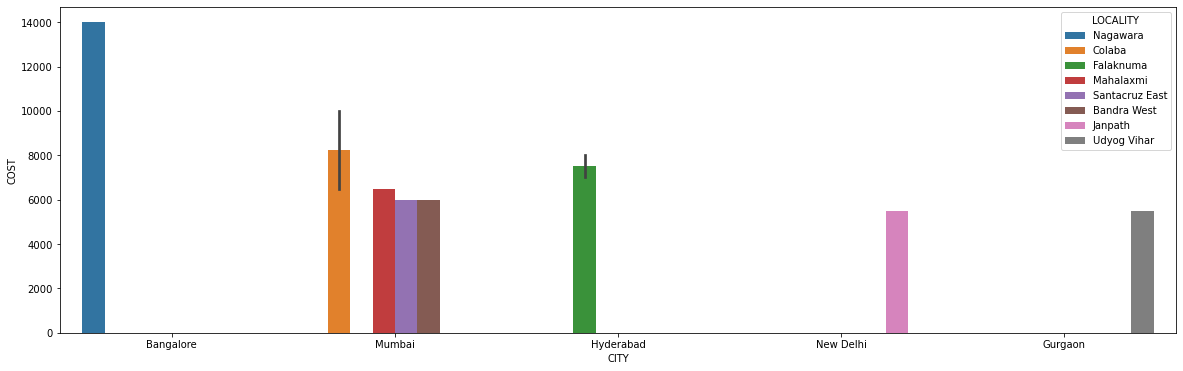

In [211]:
plt.figure(figsize=(20,6))

sns.barplot(x='CITY',y='COST',data=costly_cuisine.head(10),hue='LOCALITY')


Observation:

1.In Bangalore ,resturant offers most costly food in Nagawara,followed by Mumbai(locality is 'Colaba'),Hyderabad City(locality is 'Falaknuma')

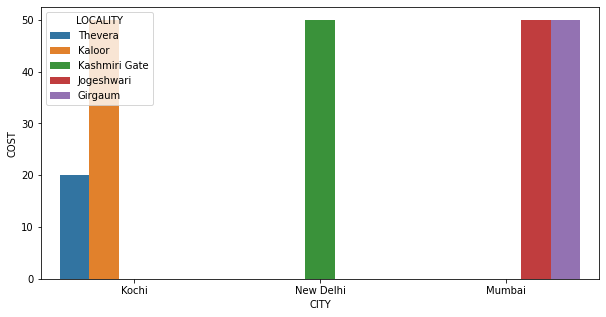

In [212]:
plt.figure(figsize=(10,5))
sns.barplot(x='CITY',y='COST',data=low_cost_cuisine.head(),hue='LOCALITY')


Observation:

Kochi offers the cheapest cuisine(locality is thevera) ,followed by Kaloor in Kochi ,KashmiriGate in NewDelhi,Jogeshwari & Girgaum in Mumbai

# converting categorical data into numerical variables

In [213]:
df.dtypes

CITY          object
LOCALITY      object
RATING       float64
VOTES        float64
COST           int64
CUISINES1     object
CUISINES2     object
CUISINES3     object
CUISINES4     object
CUISINES5     object
TITLE1        object
dtype: object

In [214]:
#transform non numeric column into numeric one
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
    if df[col].dtype==np.number:
        continue
    df[col]=le.fit_transform(df[col])

# checking correlation

In [215]:
df.corr()

,CITY,LOCALITY,RATING,VOTES,COST,CUISINES1,CUISINES2,CUISINES3,CUISINES4,CUISINES5,TITLE1
CITY,1.000000,0.043072,0.059474,0.043373,0.047501,0.013487,0.009472,-0.000553,0.000690,-0.004563,-0.020988
LOCALITY,0.043072,1.000000,-0.027201,-0.028965,-0.015322,0.019262,0.022044,0.015105,0.016441,0.014327,0.028719
RATING,0.059474,-0.027201,1.000000,0.332369,0.328600,-0.078192,-0.052648,-0.085551,-0.128806,-0.101791,-0.158810
VOTES,0.043373,-0.028965,0.332369,1.000000,0.300048,-0.040369,-0.086168,-0.146995,-0.139597,-0.101055,-0.143898
COST,0.047501,-0.015322,0.328600,0.300048,1.000000,-0.054690,-0.125934,-0.236314,-0.222913,-0.146972,-0.376683
CUISINES1,0.013487,0.019262,-0.078192,-0.040369,-0.054690,1.000000,0.038182,-0.018597,0.035213,0.032903,0.209399
CUISINES2,0.009472,0.022044,-0.052648,-0.086168,-0.125934,0.038182,1.000000,0.264758,0.157447,0.102928,0.142549
CUISINES3,-0.000553,0.015105,-0.085551,-0.146995,-0.236314,-0.018597,0.264758,1.000000,0.388728,0.215521,0.179738
CUISINES4,0.000690,0.016441,-0.128806,-0.139597,-0.222913,0.035213,0.157447,0.388728,1.000000,0.415354,0.152737
CUISINES5,-0.004563,0.014327,-0.101791,-0.101055,-0.146972,0.032903,0.102928,0.215521,0.415354,1.000000,0.108138


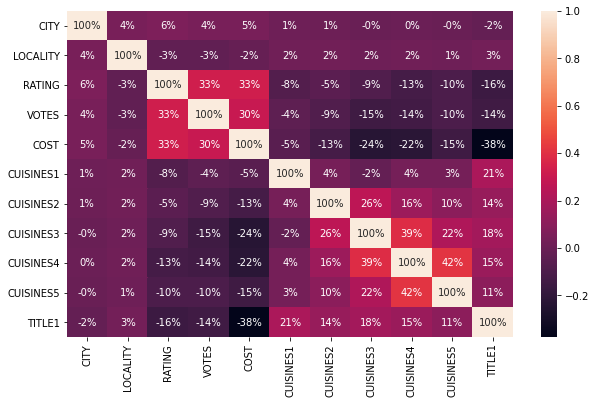

In [60]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),fmt='.0%',annot=True)

Observation:

1.Cost is negatively correlated with Title & positively correlated with votes & rating

Text(0.5, 1.0, 'correlation with target variable')

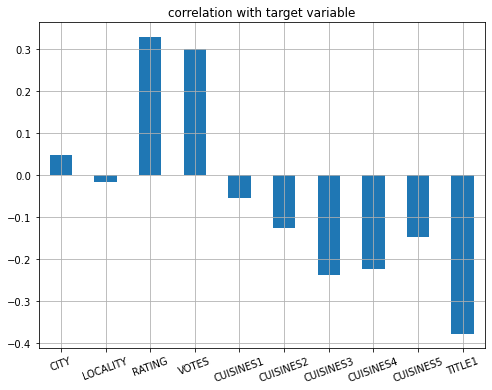

In [63]:
#Checking correlation with the traget variable .ie Cost
plt.figure(figsize=(8,6))
df.drop('COST',axis=1).corrwith(df['COST']).plot(kind='bar',grid=True)
plt.xticks(rotation=20)
plt.title('correlation with target variable')

observation:

1.Cost is positively correated with City,Rating & Votes

2.Cost is negatively correalted with Locality,Cuisines1,Cuisines2,Cuisines3,Cuisines4,Cuisines5 & Title1

Locality is very less correlated with target variable,so we can drop it

In [64]:
df.drop('LOCALITY',axis=1,inplace=True)

# checking skewness

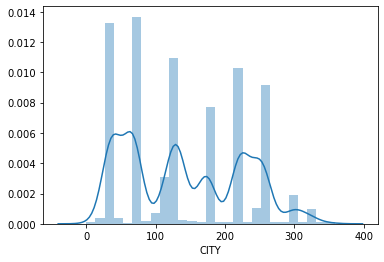

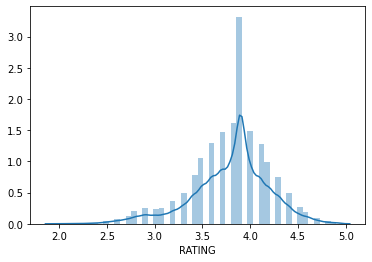

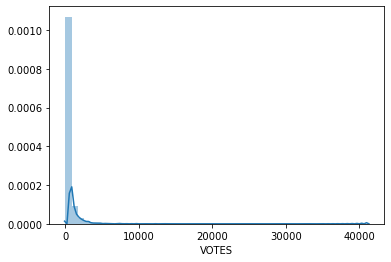

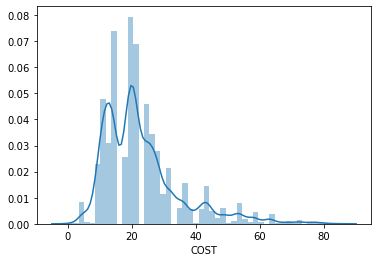

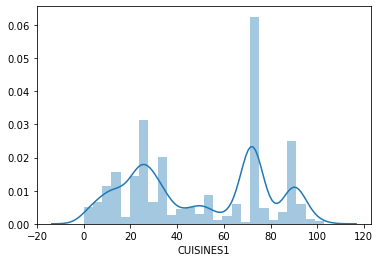

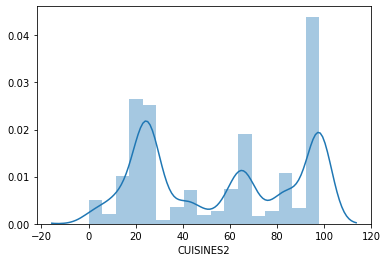

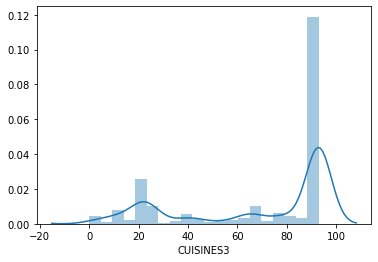

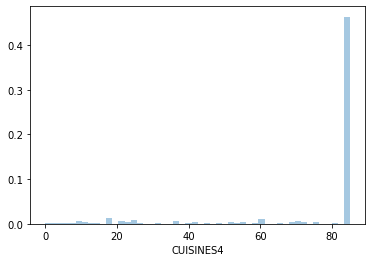

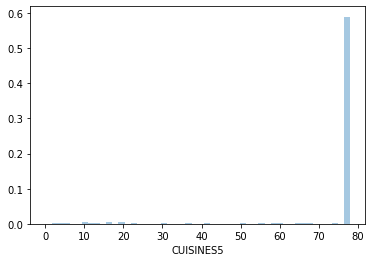

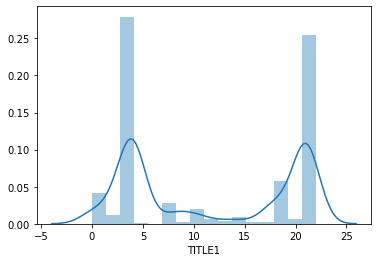

In [65]:
for i in df.columns:
    plt.figure()
    sns.distplot(df[i])

In [66]:
df.skew()

CITY          0.266332
RATING       -0.610531
VOTES        14.609221
COST          1.534165
CUISINES1     0.026008
CUISINES2     0.055174
CUISINES3    -0.823537
CUISINES4    -2.108741
CUISINES5    -4.094366
TITLE1        0.087325
dtype: float64

In [67]:
##treating skewness via squareroot method and cube root method
#treating skewness via squareroot method and cube root method
df.skew()
for col in df.skew().index:
    if col in df.describe().columns:
        if df[col].skew()>0.55:
            df[col]=np.sqrt(df[col])
        if df[col].skew()<-0.55:
            df[col]=np.cbrt(df[col])

In [68]:
#again checking skewness
df.skew()

CITY         0.266332
RATING      -0.904178
VOTES        2.287606
COST         0.778166
CUISINES1    0.026008
CUISINES2    0.055174
CUISINES3   -1.247220
CUISINES4   -2.632257
CUISINES5   -4.753390
TITLE1       0.087325
dtype: float64

# checking Outliers

CITY             AxesSubplot(0.125,0.71587;0.168478x0.16413)
RATING        AxesSubplot(0.327174,0.71587;0.168478x0.16413)
VOTES         AxesSubplot(0.529348,0.71587;0.168478x0.16413)
COST          AxesSubplot(0.731522,0.71587;0.168478x0.16413)
CUISINES1       AxesSubplot(0.125,0.518913;0.168478x0.16413)
CUISINES2    AxesSubplot(0.327174,0.518913;0.168478x0.16413)
CUISINES3    AxesSubplot(0.529348,0.518913;0.168478x0.16413)
CUISINES4    AxesSubplot(0.731522,0.518913;0.168478x0.16413)
CUISINES5       AxesSubplot(0.125,0.321957;0.168478x0.16413)
TITLE1       AxesSubplot(0.327174,0.321957;0.168478x0.16413)
dtype: object

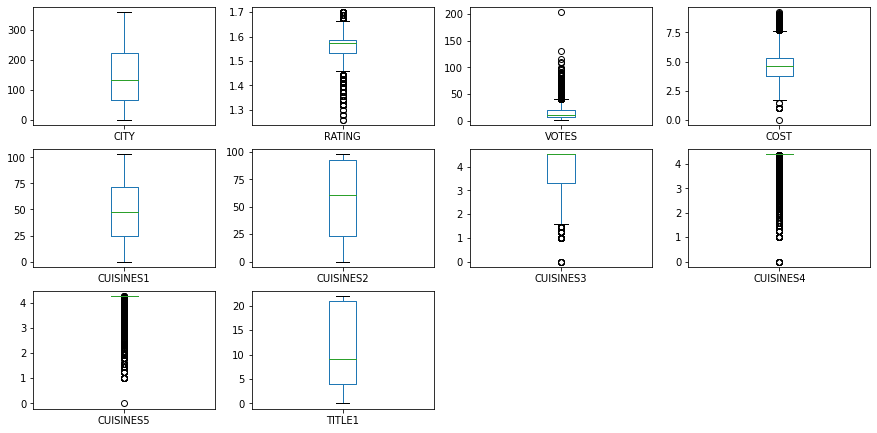

In [69]:
df.plot(kind='box',subplots=True,layout=(4,4),figsize=(15,10))

From above we see that outliers are present in certain columns

In [70]:
#Removing outliers
from scipy.stats import zscore
z_score=np.abs(zscore(df))
print(df.shape)

df_new=df.loc[(z_score<3).all(axis=1)]
print(df_new.shape)

(12690, 10)
(11344, 10)


Outliers have been removed

# Feature Selection

In [71]:
df_new.head()

,CITY,RATING,VOTES,COST,CUISINES1,CUISINES2,CUISINES3,CUISINES4,CUISINES5,TITLE1
0,320,1.532619,7.000000,6.000000,59,32,4.041240,4.396830,4.272659,4
1,67,1.613429,5.477226,6.557439,6,60,3.448217,4.396830,4.272659,4
2,67,1.560491,14.866069,5.291503,72,23,2.289428,3.174802,4.272659,4
3,222,1.600521,4.898979,5.291503,100,23,4.530655,4.396830,4.272659,21
4,222,1.560491,12.845233,3.741657,28,98,4.530655,4.396830,4.272659,8


In [72]:
df_new.shape

(11344, 10)

In [73]:
#spliting the data into input and output variable
x=df_new.drop('COST',axis=1)
x.head()

,CITY,RATING,VOTES,CUISINES1,CUISINES2,CUISINES3,CUISINES4,CUISINES5,TITLE1
0,320,1.532619,7.000000,59,32,4.041240,4.396830,4.272659,4
1,67,1.613429,5.477226,6,60,3.448217,4.396830,4.272659,4
2,67,1.560491,14.866069,72,23,2.289428,3.174802,4.272659,4
3,222,1.600521,4.898979,100,23,4.530655,4.396830,4.272659,21
4,222,1.560491,12.845233,28,98,4.530655,4.396830,4.272659,8


In [74]:
y=df_new['COST']
y.head()

0    6.000000
1    6.557439
2    5.291503
3    5.291503
4    3.741657
Name: COST, dtype: float64

In [75]:
# checking the shape of input & target variable
print(x.shape)
print(y.shape)

(11344, 9)
(11344,)


In [76]:
#scaling the input variable
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [77]:
#splitting data into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [78]:
print('x_train_shape:',x_train.shape)
print('x_test_shape:',x_test.shape)
print('y_train_shape:',y_train.shape)
print('y_test_shape:',y_test.shape)


x_train_shape: (9075, 9)
x_test_shape: (2269, 9)
y_train_shape: (9075,)
y_test_shape: (2269,)


In [79]:
#Importing all the model library

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

#Importing boosting model
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

#import error metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV,cross_val_score

In [80]:
#All Algorithm by using for loop
model=[LinearRegression(),SVR(),DecisionTreeRegressor(),Lasso(),Ridge(),ElasticNet(),
       RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]

for m in model:
    m.fit(x_train,y_train)
    score=m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('score of ',m,'is',score)
    print('MAE:',mean_absolute_error(y_test,predm))
    print('MSE:',mean_squared_error(y_test,predm))
    print('RMSE:',np.sqrt(mean_squared_error(y_test,predm)))
    print('R2_SCORE:',r2_score(y_test,predm))
    print('*****************************************************************************************')
    print('\n')

score of  LinearRegression() is 0.3261026753490536
MAE: 0.658098810499534
MSE: 0.7737719666041296
RMSE: 0.8796430904657466
R2_SCORE: 0.34116844469632013
*****************************************************************************************


score of  SVR() is 0.46995051080642036
MAE: 0.5973058831579563
MSE: 0.652933396313572
RMSE: 0.8080429421222438
R2_SCORE: 0.444056978581306
*****************************************************************************************


score of  DecisionTreeRegressor() is 0.991070465754728
MAE: 0.6281438549816426
MSE: 0.677146481810147
RMSE: 0.8228891066298952
R2_SCORE: 0.42344064009282345
*****************************************************************************************


score of  Lasso() is 0.0
MAE: 0.8370235140259876
MSE: 1.1748869872278398
RMSE: 1.0839220392758142
R2_SCORE: -0.0003627095699454408
*****************************************************************************************


score of  Ridge() is 0.3261026734174062
MAE: 0.65809

In [81]:
#cross validate all algorithm by using for loop

model=[LinearRegression(),SVR(),DecisionTreeRegressor(),Lasso(),Ridge(),ElasticNet(),
       RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]

for m in model:
    score=cross_val_score(m,x,y,cv=10,scoring='r2')
    print('model:',m)
    print('score:',score)
    print('mean score:',score.mean())
    print('standard deviation:',score.std())
    print('***************************************************************************************')
    print('\n')

model: LinearRegression()
score: [0.31984299 0.31874403 0.33343849 0.34507365 0.32427514 0.34871242
 0.30335907 0.31882434 0.32203469 0.33813464]
mean score: 0.3272439458268576
standard deviation: 0.013191372863516156
***************************************************************************************


model: SVR()
score: [0.42459635 0.422016   0.44393101 0.41941452 0.42094017 0.46478572
 0.4050169  0.4275874  0.41550841 0.44314957]
mean score: 0.42869460617294575
standard deviation: 0.01639221983973429
***************************************************************************************


model: DecisionTreeRegressor()
score: [0.35446591 0.41202    0.36107523 0.35848013 0.36200232 0.4748667
 0.44966755 0.40360736 0.42616823 0.39336129]
mean score: 0.3995714716362005
standard deviation: 0.03963913162901556
***************************************************************************************


model: Lasso()
score: [-4.01028779e-03 -1.15400236e-03 -8.97574401e-04 -4.37886505e-03

# RandomForestRegressor giving best score & r2_score,So,I choose it as the final model

Using GridSEarchCV to find best parameter

In [83]:
from sklearn.model_selection import GridSearchCV
parameters={'n_estimators':[400,500,600,700],'max_depth':[4,5,6,7,10,15]}
rfc=RandomForestRegressor()
clf=GridSearchCV(rfc,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'max_depth': 15, 'n_estimators': 600}


In [84]:
#using RandomForestREgressor with its best parameters
rf=RandomForestRegressor(n_estimators=600,min_samples_split=15,max_depth=15)
rf.fit(x_train,y_train)
print('Score:',rf.score(x_train,y_train))
y_pred=rf.predict(x_test)
print('\n')
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2_SCORE:',r2_score(y_test,y_pred))

Score: 0.8179044259385351


MAE: 0.4648678437216653
MSE: 0.3612150949481263
RMSE: 0.6010117261319669
R2_SCORE: 0.6924418135122312


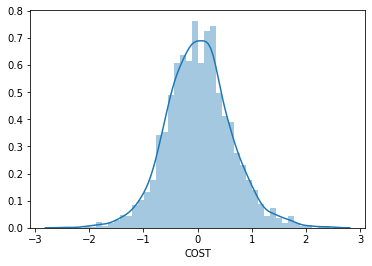

In [90]:
#plotting the distribution plot
sns.distplot(y_test-y_pred)
plt.show()

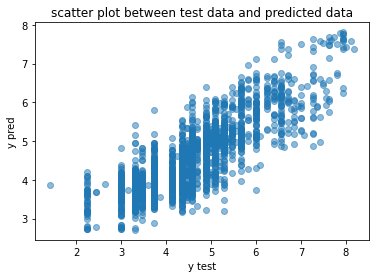

In [91]:
#scatter plot between test data & predicted data
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel('y test')
plt.ylabel('y pred')
plt.title('scatter plot between test data and predicted data')
plt.show()

In [92]:
#saving the model

import joblib
joblib.dump(rf,'restaurant_cost_prediction_rf.pkl')

['restaurant_cost_prediction_rf.pkl']

# loading Test dataset

In [86]:
df1.head()

,CITY,RATING,VOTES,CUISINES1,CUISINES2,CUISINES3,CUISINES4,CUISINES5,TITLE1
0,Noida,4.3,564.0,North Indian,Chinese,Mughlai,Kebab,XXX,CASUAL DINING
1,Mumbai,4.2,61.0,South Indian,Fast Food,Pizza,North Indian,XXX,QUICK BITES
2,Mumbai,3.8,350.0,North Indian,Seafood,Biryani,Chinese,XXX,CASUAL DINING
3,Faridabad,3.8,1445.0,Biryani,XXX,XXX,XXX,XXX,None
4,Kochi,3.6,23.0,South Indian,Kerala,XXX,XXX,XXX,QUICK BITES


Now we will copy the same step for test data (.ie df1) in one cell.

In [219]:
print(df1.head())

#checking shape of dataset
print(df1.shape)

#checking column names
print(df1.columns)

#checking the information of dataset
print(df1.info())

#checking the datatype
print(df1.dtypes)

#checking for null values
print(df1.isnull().values.any())

#checking for null values in each column
print(df1.isnull().sum())

#imputing the missing values with mode

for col in ['CITY','LOCALITY','RATING','VOTES']:
    print(df1[col].fillna(df1[col].mode()[0],inplace=True))
    
#now again checking for missing values

print(df1.isnull().values.any())

print(df1.drop('RESTAURANT_ID',axis=1,inplace=True))

print(df1.drop('TIME',axis=1,inplace=True))

df1.replace({'NEW': 3.9, '-': 3.9},inplace=True)

#changing ratings column into Float type
df1['RATING']=df1['RATING'].astype(float)

df1['VOTES'] = df1['VOTES'].str.replace(' votes', '').astype(float)


df1['CUISINES1']=df1['CUISINES'].str.split(',').str[0]
df1['CUISINES2']=df1['CUISINES'].str.split(',').str[1]
df1['CUISINES3']=df1['CUISINES'].str.split(',').str[2]
df1['CUISINES4']=df1['CUISINES'].str.split(',').str[3]
df1['CUISINES5']=df1['CUISINES'].str.split(',').str[4]

df1['CUISINES2'].fillna('XXX',inplace=True)
df1['CUISINES3'].fillna('XXX',inplace=True)
df1['CUISINES4'].fillna('XXX',inplace=True)
df1['CUISINES5'].fillna('XXX',inplace=True)

print(df1.drop(['CUISINES'],axis=1,inplace=True))

df1['TITLE1']=df1['TITLE'].str.split(',').str[0]
df1['TITLE2']=df1['TITLE'].str.split(',').str[1]

#In TITLE2 11208 rows are null,so we can drop it
df1.drop(['TITLE','TITLE2'],axis=1,inplace=True)

df1.drop('LOCALITY',axis=1,inplace=True)

           TITLE  RESTAURANT_ID                                      CUISINES  \
0  CASUAL DINING           4085         North Indian, Chinese, Mughlai, Kebab   
1    QUICK BITES          12680  South Indian, Fast Food, Pizza, North Indian   
2  CASUAL DINING           1411       North Indian, Seafood, Biryani, Chinese   
3           None            204                                       Biryani   
4    QUICK BITES          13453                          South Indian, Kerala   

                                                TIME       CITY      LOCALITY  \
0                      12noon – 12midnight (Mon-Sun)      Noida     Sector 18   
1                            7am – 12:30AM (Mon-Sun)     Mumbai    Grant Road   
2                           11am – 11:30pm (Mon-Sun)     Mumbai  Marine Lines   
3  9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...  Faridabad           NIT   
4                              11am – 10pm (Mon-Sun)      Kochi        Kaloor   

  RATING       VOTES  
0  

In [220]:
#transform non numeric column into numeric one
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df1.columns:
    if df1[col].dtype==np.number:
        continue
    df1[col]=le.fit_transform(df1[col])

In [221]:
df.columns

Index(['CITY', 'LOCALITY', 'RATING', 'VOTES', 'COST', 'CUISINES1', 'CUISINES2',
       'CUISINES3', 'CUISINES4', 'CUISINES5', 'TITLE1'],
      dtype='object')

In [222]:
df1.columns

Index(['CITY', 'RATING', 'VOTES', 'CUISINES1', 'CUISINES2', 'CUISINES3',
       'CUISINES4', 'CUISINES5', 'TITLE1'],
      dtype='object')

The columns in the test dataset(.ie df1) match with the train dataset(.ie df) and is ready for prediction of cost 

In [223]:
model = joblib.load("restaurant_cost_prediction_rf.pkl")
cost_prediction = model.predict(df1)
print(cost_prediction)

[3.71988982 3.71988982 3.71988982 ... 3.71988982 3.71988982 3.71988982]
